<h1> ArduFarmBot Data Analysis</h1>
<h2> Garden automation with help of IoT </h2>

### Abstract
<p>The real “crop data” used on this project was generated by an IoT automatic gardening system, the “ArduFarmBot”, which decide automatically when to water and heat a small home tomato plantation, based on captured data from sensors as: temperature, relative air humidity, lightness and soil moisture (humidity). </p>
<p>Using “Scikit” to perform a Decision Tree based Classification of data logged on “ThingSpeak” website, was possible to create a model that could predict with very high accuracy, when and how a pump and a lamp would be turned on to help on the crop growth. </p>
<p>With a a very high accuracy, this project confirms that the Pump was planned to be Turned On every time that soil humidity drops bellow 65% and the air temperature in low (at morning for example) and that the Lamp was Turned On every time that the air temperature was low (around 12oC) keeping this way, the crop warm. </p>

### Motivation
<p>A couple of years ago, I developed the ArduFarmBot, an automatic gardening IoT based system, that automatically controls a pump and a lamp to control water and heat to be delivered to a plantation. The system action was based on real data, which were also logged on ThingSpeak.com (both, sensors and actuators’ echo). </p>

<p>So, a question come to my mind: “Can the ArduFarmBot historical data stored on ThingSpeak website be used to predict when the Water Pump and Lamp should be turned on in order to keep a small plantation warm and wet? Using Classification technics, seems to me a good path to follow here. This analysis and prediction is my first attempt to integrate IoT with Data Science.</p>

### Dataset
- ArduFarmBot is a gardening system, that capture data as temperature, relative air humidity, lightness and soil moisture (humidity).
- ArduFarmBot has 2 actuators, a pump and a lamp
- ArduFarmBot logs all captured data from sensors and actuators (“echo” of commands) on ThingSpeak.com. 
- The Dataset used on this work is the historical data found on ThingSpeak website for an ArduFarmBot operation, that happened from September to December, 2016 (https://thingspeak.com/channels/146159)
- See, bellow block diagram for details.

<p><img src="https://cdn.instructables.com/FKH/PRTK/ISCB4CIA/FKHPRTKISCB4CIA.LARGE.jpg?raw=true"></p>

<h3> Data captured between September 2016 and December 2016 by Marcelo Rovai</h3>

In [1]:
#Importing libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls

ArduFarmBot_Data_Sept_Dec_2016.csv      MAU_ArduFarmBot - 2nd Database.ipynb
ArduFarmBot_Mau_Data_Sept_Nov_2016.csv  MJR_ArduFarmBot.ipynb
ArduFarmBot_Mau_Data_Sept_Nov_2016.xlsx


In [4]:
data = pd.read_csv('./ArduFarmBot_Data_Sept_Dec_2016.csv')
data.shape # Raw data: 47,164 measurements with 10 columns

(47164, 10)

### Data Preparation

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47164 entries, 0 to 47163
Data columns (total 10 columns):
created_at                  47164 non-null object
entry_id                    47164 non-null int64
Temperature                 18529 non-null float64
Humidity                    18529 non-null float64
Luminosity                  18529 non-null float64
Soil Moisture               18529 non-null float64
Pump Echo                   47134 non-null float64
Lamp Echo                   47134 non-null float64
Capacitive Soil Mositure    13776 non-null float64
Spare                       13584 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 3.6+ MB


In [6]:
data.head()

,created_at,entry_id,Temperature,Humidity,Luminosity,Soil Moisture,Pump Echo,Lamp Echo,Capacitive Soil Mositure,Spare
0,2016-09-19 17:30:23 UTC,1,21.0,43.0,85.0,0.0,0.0,0.0,NaN,NaN
1,2016-09-19 17:30:51 UTC,2,21.0,42.0,86.0,0.0,1.0,0.0,NaN,NaN
2,2016-09-19 17:31:42 UTC,3,21.0,42.0,86.0,0.0,1.0,0.0,NaN,NaN
3,2016-09-19 17:32:09 UTC,4,21.0,43.0,86.0,0.0,0.0,0.0,NaN,NaN
4,2016-09-19 17:33:02 UTC,5,21.0,43.0,86.0,0.0,0.0,0.0,NaN,NaN


In [7]:
data.tail()

,created_at,entry_id,Temperature,Humidity,Luminosity,Soil Moisture,Pump Echo,Lamp Echo,Capacitive Soil Mositure,Spare
47159,2016-12-14 14:26:34 UTC,47160,27.0,17.0,91.0,88.0,0.0,0.0,97.0,0.0
47160,2016-12-14 14:27:18 UTC,47161,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
47161,2016-12-14 14:31:26 UTC,47162,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
47162,2016-12-14 14:35:34 UTC,47163,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
47163,2016-12-14 14:36:41 UTC,47164,28.0,17.0,91.0,89.0,0.0,0.0,98.0,0.0


In [8]:
data['Temperature'].describe()

count    18529.000000
mean        18.754223
std          5.869399
min          0.000000
25%         14.000000
50%         17.000000
75%         23.000000
max         58.000000
Name: Temperature, dtype: float64

In [9]:
data['Humidity'].describe()

count    18529.000000
mean        37.400561
std         13.388502
min          0.000000
25%         27.000000
50%         35.000000
75%         48.000000
max         95.000000
Name: Humidity, dtype: float64

In [10]:
data['Luminosity'].describe()

count    18529.000000
mean        46.731610
std         41.341396
min          0.000000
25%          1.000000
50%         63.000000
75%         88.000000
max         97.000000
Name: Luminosity, dtype: float64

In [11]:
data['Soil Moisture'].describe()

count    18529.000000
mean        78.210751
std         16.958982
min          0.000000
25%         76.000000
50%         82.000000
75%         86.000000
max        102.000000
Name: Soil Moisture, dtype: float64

In [12]:
data['Capacitive Soil Mositure'].describe()

count    13776.000000
mean        82.467189
std         18.111382
min       -133.000000
25%         69.000000
50%         92.000000
75%         98.000000
max        114.000000
Name: Capacitive Soil Mositure, dtype: float64

In [13]:
data.corr()

,entry_id,Temperature,Humidity,Luminosity,Soil Moisture,Pump Echo,Lamp Echo,Capacitive Soil Mositure,Spare
entry_id,1.000000,0.020369,-0.346100,0.025523,0.346649,-0.093943,-0.074037,0.750806,-0.026323
Temperature,0.020369,1.000000,-0.703684,0.628502,-0.057865,0.066085,-0.299652,0.253139,NaN
Humidity,-0.346100,-0.703684,1.000000,-0.413793,-0.065922,-0.042927,0.227611,-0.251573,NaN
Luminosity,0.025523,0.628502,-0.413793,1.000000,-0.047375,0.090104,-0.141660,0.101534,NaN
Soil Moisture,0.346649,-0.057865,-0.065922,-0.047375,1.000000,-0.398164,0.045351,0.092071,NaN
Pump Echo,-0.093943,0.066085,-0.042927,0.090104,-0.398164,1.000000,0.006109,0.028926,0.127469
Lamp Echo,-0.074037,-0.299652,0.227611,-0.141660,0.045351,0.006109,1.000000,-0.188517,0.042164
Capacitive Soil Mositure,0.750806,0.253139,-0.251573,0.101534,0.092071,0.028926,-0.188517,1.000000,-0.056027
Spare,-0.026323,NaN,NaN,NaN,NaN,0.127469,0.042164,-0.056027,1.000000


### Data Cleaning

We will use data from temperature, humidity, luminosity and soil moinsture sensors. We will disregard Soil Temperature data colected from Capacitive Soil Moisture sensor. 

For our general analysis here, we will not need time, entry id and spare. Let's also deleted those columns

In [14]:
df = data
df.shape # Raw data: 47,164 measurements with 10 columns

(47164, 10)

In [15]:
del df['created_at']
del df['entry_id']
del df['Capacitive Soil Mositure']
del df['Spare']

In [16]:
df.head()

,Temperature,Humidity,Luminosity,Soil Moisture,Pump Echo,Lamp Echo
0,21.0,43.0,85.0,0.0,0.0,0.0
1,21.0,42.0,86.0,0.0,1.0,0.0
2,21.0,42.0,86.0,0.0,1.0,0.0
3,21.0,43.0,86.0,0.0,0.0,0.0
4,21.0,43.0,86.0,0.0,0.0,0.0


In [17]:
# changing the colums name
df.columns = ['temp', 'humi', 'lumi', 'soil', 'pump', 'lamp']

In [18]:
df.head()

,temp,humi,lumi,soil,pump,lamp
0,21.0,43.0,85.0,0.0,0.0,0.0
1,21.0,42.0,86.0,0.0,1.0,0.0
2,21.0,42.0,86.0,0.0,1.0,0.0
3,21.0,43.0,86.0,0.0,0.0,0.0
4,21.0,43.0,86.0,0.0,0.0,0.0


In [19]:
rows_before = df.shape[0]
df_clean = df.dropna(thresh=3) # drop rows with more than 3 NaN's
rows_after = df_clean.shape[0]

In [20]:
rows_before - rows_after

28635

In [21]:
df_clean.shape 

(18529, 6)

In [22]:
df_clean.head()

,temp,humi,lumi,soil,pump,lamp
0,21.0,43.0,85.0,0.0,0.0,0.0
1,21.0,42.0,86.0,0.0,1.0,0.0
2,21.0,42.0,86.0,0.0,1.0,0.0
3,21.0,43.0,86.0,0.0,0.0,0.0
4,21.0,43.0,86.0,0.0,0.0,0.0


Soil = 0.0, means that Soil Moisture sensor was not connected and eventual pump = 1.0, means that the pump was Turned ON manuallly. Let's also clean those samples.

In [23]:
filter = df_clean['soil']>0.0
df_clean = df_clean[filter]
df_clean.shape # Clean data: 18,023 samples with 6 columns

(18023, 6)

In [24]:
df_clean.head()

,temp,humi,lumi,soil,pump,lamp
504,23.0,32.0,73.0,8.0,0.0,0.0
505,23.0,32.0,73.0,8.0,0.0,0.0
506,23.0,32.0,73.0,8.0,0.0,0.0
507,23.0,32.0,73.0,8.0,0.0,0.0
508,23.0,32.0,73.0,8.0,0.0,0.0


In [25]:
df_clean.describe()

,temp,humi,lumi,soil,pump,lamp
count,18023.000000,18023.000000,18023.000000,18023.000000,18023.00000,18023.000000
mean,18.632803,37.527937,45.563336,80.406536,0.00799,0.069078
std,5.902445,13.532227,41.309369,10.914068,0.08903,0.253594
min,5.000000,2.000000,0.000000,1.000000,0.00000,0.000000
25%,14.000000,27.000000,1.000000,77.000000,0.00000,0.000000
50%,17.000000,35.000000,57.000000,83.000000,0.00000,0.000000
75%,23.000000,48.000000,88.000000,86.000000,0.00000,0.000000
max,58.000000,95.000000,97.000000,102.000000,1.00000,1.000000


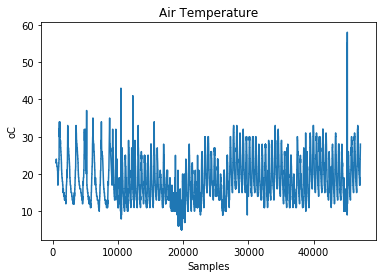

In [26]:
plt.xlabel('Samples')
plt.ylabel('oC')
plt.title('Air Temperature')
plt.plot(df_clean['temp'])

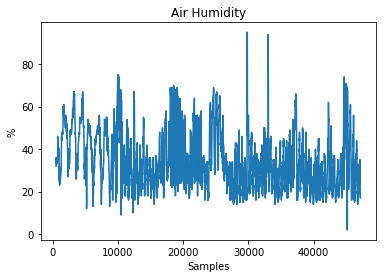

In [27]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Air Humidity')
plt.plot(df_clean['humi'])

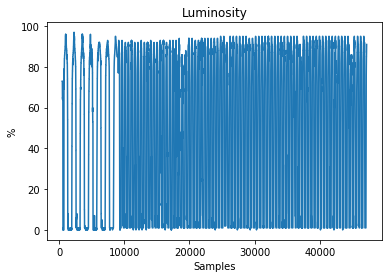

In [28]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Luminosity')
plt.plot(df_clean['lumi'])

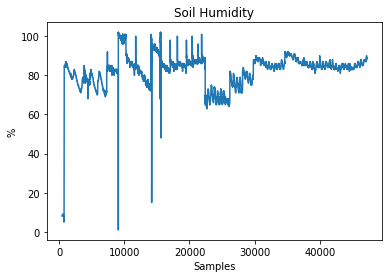

In [29]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Soil Humidity')
plt.plot(df_clean['soil'])

Looking on the graphs, its clear that measurements should be bad outside of the range:
 - Temperature lower than 45oC
 - Humidity between 10% and 80%
 - Soil Moisture with humidity greater than 60%

Let's also clean those cells

In [30]:
filter = df_clean['temp']<45.0
df_clean = df_clean[filter]
df_clean.shape

(18021, 6)

In [31]:
filter = df_clean['humi']<80.0
df_clean = df_clean[filter]
df_clean.shape

(18000, 6)

In [32]:
filter = df_clean['humi']>10.0
df_clean = df_clean[filter]
df_clean.shape

(17996, 6)

In [33]:
filter = df_clean['soil']>60.0
df_clean = df_clean[filter]
df_clean.shape

(17739, 6)

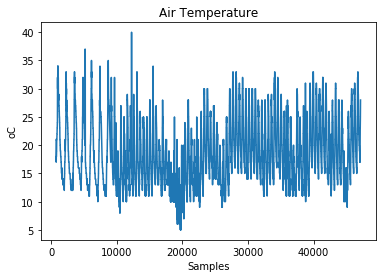

In [34]:
plt.xlabel('Samples')
plt.ylabel('oC')
plt.title('Air Temperature')
plt.plot(df_clean['temp'])

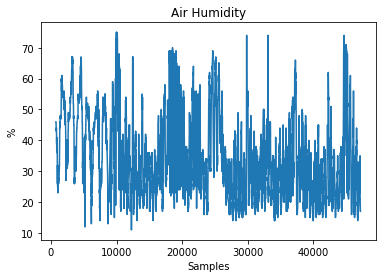

In [35]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Air Humidity')
plt.plot(df_clean['humi'])

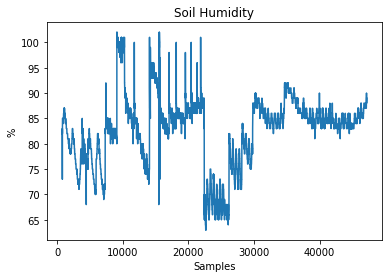

In [36]:
plt.xlabel('Samples')
plt.ylabel('%')
plt.title('Soil Humidity')
plt.plot(df_clean['soil'])

### Let's take a quick look on the actuators Echo

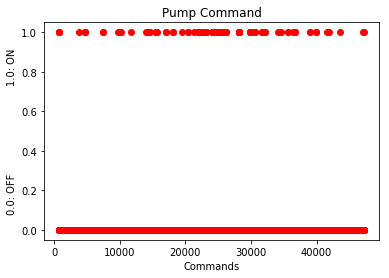

In [37]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Pump Command')
plt.plot(df_clean['pump'], 'ro')

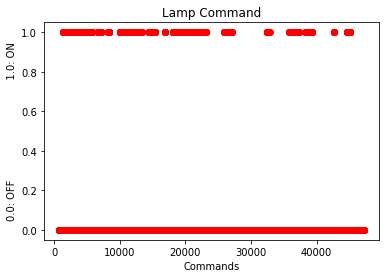

In [38]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                                1.0: ON')
plt.title('Lamp Command')
plt.plot(df_clean['lamp'], 'ro')

### ML Method 

<p>On this analysis, for ML, we use scikit-learn to perform a decision tree based classification of data. The sensor data (‘temp’, ‘humi’, ‘lumi’ and ‘soil’) is used to train the model. </p>
<p>
Two separated analysis are performed:
</p>
<p> 1.Prediction of Pump operation: Target Variable (y) ==> ‘pump’</p>
<p> 2.Prediction of Lamp operation: Target Variable (y) ==> ‘lamp’</p>

<p>Being for both cases, the Features (X) è 'temp',’ humi', 'lumi’ and 'soil’</p>

### 1. Pump Command

In [39]:
# Target variable
y = df_clean[['pump']].copy()
y.head()

,pump
780,0.0
781,0.0
785,0.0
786,0.0
787,0.0


In [40]:
# Features in X
X = df_clean[['temp','humi', 'lumi', 'soil']].copy()
X.head()

,temp,humi,lumi,soil
780,21.0,46.0,72.0,82.0
781,21.0,46.0,72.0,82.0
785,17.0,44.0,72.0,73.0
786,17.0,44.0,72.0,73.0
787,17.0,44.0,72.0,73.0


Perform Test and Train split (1/3 of data for test) 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=0)

Fit on Train Set 

In [42]:
pump_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
pump_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Predict on Test Set

In [43]:
predictions = pump_classifier.predict(X_test)

In [44]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9952169456781688

Good Accuracy: 99%

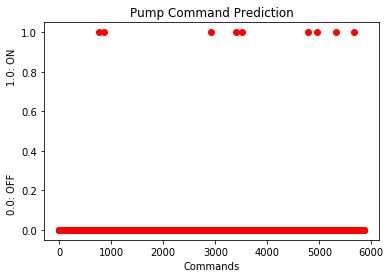

In [46]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Pump Command Prediction')
plt.plot(predictions, 'ro')

In [47]:
df_test = X_test
df_test['pump']=predictions

In [48]:
df_test = df_test[df_test.pump !=0]
df_test.head()

,temp,humi,lumi,soil,pump
25914,12.0,39.0,1.0,65.0,1.0
15578,27.0,17.0,87.0,102.0,1.0
22647,13.0,26.0,1.0,63.0,1.0
26125,11.0,41.0,84.0,65.0,1.0
22674,12.0,50.0,1.0,63.0,1.0


In [49]:
df_test.describe()

,temp,humi,lumi,soil,pump
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,14.444444,36.333333,36.777778,71.888889,1.0
std,6.424778,13.518506,39.801940,15.471300,0.0
min,9.000000,17.000000,1.000000,63.000000,1.0
25%,11.000000,26.000000,1.000000,63.000000,1.0
50%,12.000000,39.000000,25.000000,65.000000,1.0
75%,13.000000,50.000000,84.000000,65.000000,1.0
max,27.000000,52.000000,88.000000,102.000000,1.0


Lower standart deviation are temperature and humidity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1844b2b0>]],
      dtype=object)

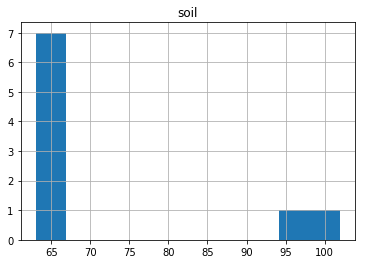

In [50]:
df_test.hist(column='soil', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1844cc18>]],
      dtype=object)

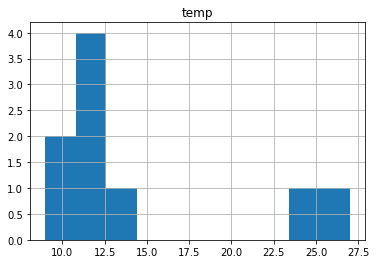

In [51]:
df_test.hist(column='temp', bins=10)

### Conclusion: 
Seems that the Pump is Turned ON automatically everytime that soil humidity reach its lowers at 65% and Temperature is low (10 to 15 oC). Some actuations apears around 100% what make nor sense unless it was manual commands,

### 1. Lamp Command

In [52]:
# Target variable
y = df_clean[['lamp']].copy()
y.head()

,lamp
780,0.0
781,0.0
785,0.0
786,0.0
787,0.0


In [53]:
# Features in X
X = df_clean[['temp','humi', 'lumi', 'soil']].copy()
X.head()

,temp,humi,lumi,soil
780,21.0,46.0,72.0,82.0
781,21.0,46.0,72.0,82.0
785,17.0,44.0,72.0,73.0
786,17.0,44.0,72.0,73.0
787,17.0,44.0,72.0,73.0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [55]:
lamp_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
lamp_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [56]:
predictions = pump_classifier.predict(X_test)

In [57]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9284250085411684

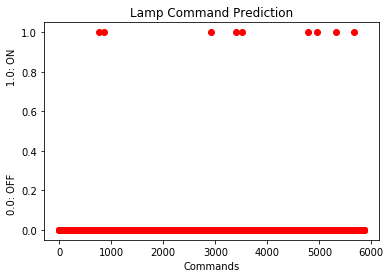

In [58]:
plt.xlabel('Commands')
plt.ylabel('0.0: OFF                            1.0: ON')
plt.title('Lamp Command Prediction')
plt.plot(predictions, 'ro')

In [59]:
df_test = X_test
df_test['lamp']=predictions
df_test = df_test[df_test.lamp !=0]
df_test

,temp,humi,lumi,soil,lamp
25914,12.0,39.0,1.0,65.0,1.0
15578,27.0,17.0,87.0,102.0,1.0
22647,13.0,26.0,1.0,63.0,1.0
26125,11.0,41.0,84.0,65.0,1.0
22674,12.0,50.0,1.0,63.0,1.0
22691,10.0,52.0,43.0,65.0,1.0
22633,12.0,28.0,1.0,63.0,1.0
14621,24.0,22.0,88.0,96.0,1.0
26081,9.0,52.0,25.0,65.0,1.0


In [60]:
df_test.describe()

,temp,humi,lumi,soil,lamp
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,14.444444,36.333333,36.777778,71.888889,1.0
std,6.424778,13.518506,39.801940,15.471300,0.0
min,9.000000,17.000000,1.000000,63.000000,1.0
25%,11.000000,26.000000,1.000000,63.000000,1.0
50%,12.000000,39.000000,25.000000,65.000000,1.0
75%,13.000000,50.000000,84.000000,65.000000,1.0
max,27.000000,52.000000,88.000000,102.000000,1.0


Lower standart deviation is temperature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18869630>]],
      dtype=object)

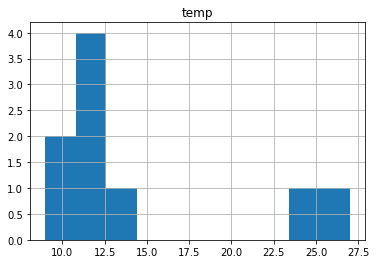

In [61]:
df_test.hist(column='temp', bins=10)

### Conclusion
The lamp is turned ON automatically at lower temperatures (around 12oC). Some actuations appears around 25oC what can be attribuit to manual commands.

## General Conclusions

- Using scikit-learn to perform a decision tree based classification of data logged on ThingSpeak website, was possible to create a model that could predict with very high accuracy, when and how a pump and a lamp would be turned to help in the crop growth. In short:
- The Pump should be Turned On every time that soil humidity drops bellow 65% and the air temperature in low, at morning for example. This make sense and it is really advise not water a plantation when the day is hot.
- The Lamp was Turned On every time that the air temperature was low (around 12oC). This is key to help, mainly on the early stages of seed germination phase. Temperatures lower than 10oC for tomatoes (from were the data were got), delay gemination 
- The data related with Air Humidity and luminosity were not used for actuators control. 

## References

This work was based on the information learned on:
<p> 1. “UCSanDiegoX: DSE200x - Python for Data Science”. My sincere thanks to professors :</p>

- Ilkay Altintas, Chief Data Science Officer, San Diego Supercomputer Center (SDSC) 
- Leo Porter, Assistant Teaching Professor, Computer Science and Engineering Department


<p> 2. ArduFarmBot: Tomato garden automation with help of "Internet of Things" - IoT ( MJRoBot Tutorials Book 1) by Marcelo Rovai and Maurício Pinto
English | 6 Apr. 2017 | ASIN: B06Y4CTW23 | 125 Pages | PDF | 29.88 MB</p>